In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
!wget https://files.grouplens.org/datasets/movielens/ml-25m.zip
!unzip ml-25m.zip
# !wget https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
# !unzip ml-latest-small.zip

--2024-05-15 17:07:07--  https://files.grouplens.org/datasets/movielens/ml-25m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 261978986 (250M) [application/zip]
Saving to: ‘ml-25m.zip’

ml-25m.zip          100%[===================>] 249.84M  16.9MB/s    in 16s     

2024-05-15 17:07:24 (15.8 MB/s) - ‘ml-25m.zip’ saved [261978986/261978986]

Archive:  ml-25m.zip
   creating: ml-25m/
  inflating: ml-25m/tags.csv         
  inflating: ml-25m/links.csv        
  inflating: ml-25m/README.txt       
  inflating: ml-25m/ratings.csv      
  inflating: ml-25m/genome-tags.csv  
  inflating: ml-25m/genome-scores.csv  
  inflating: ml-25m/movies.csv       


In [ ]:
movies = pd.read_csv("ml-25m/movies.csv")
movies#.head(8)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [ ]:
# from matplotlib import pyplot as plt
# import seaborn as sns
# _df_1.groupby('title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
# plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
genres = sorted(list(set('|'.join(list(movies["genres"])).split("|"))))#Get every genre in a list
dict_genres = dict(zip(genres, list(range(20))))#{'(no genres listed)': 0, 'Action': 1, 'Adventure': 2, 'Ani
genres_per_movie = [g.split('|') for g in list(movies["genres"])]#list of list of genres
feature_embedding = [[0]*20 for _ in range(movies.shape[0])]
for i in range(movies.shape[0]):
  for g in genres_per_movie[i]:
    feature_embedding[i][dict_genres[g]] = 1

In [ ]:
distribution_of_genres = list(np.sum(np.array(feature_embedding), axis=0))

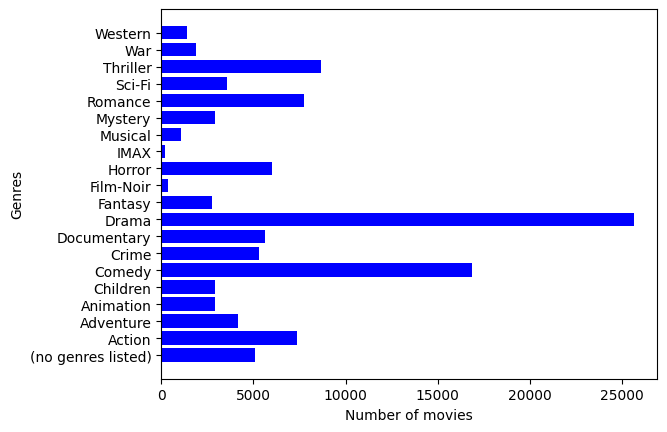

In [ ]:
plt.barh(genres,distribution_of_genres, color="blue")
plt.xlabel("Number of movies")
plt.ylabel("Genres")
plt.savefig("movies_genres.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
print("Number of movies : ",movies.shape[0])
genres = '|'.join(list(movies["genres"])).split("|")
print("Number of genres : ",len(set(genres)))
print(f"Many of the movies have the genre {max(genres)}")

Number of movies :  62423
Number of genres :  20
Many of the movies have the genre Western


In [ ]:
num_of_genres_per_movies = [len(genres_per_movie[i]) for i in range(len(genres_per_movie))]

In [ ]:
# xnum = list(range(len(num_of_genres_per_movies)))

In [ ]:
# plt.bar(x=xnum,height=num_of_genres_per_movies, color="blue")
# plt.xlabel("Number of movies")
# plt.ylabel("Genres")
# plt.savefig("movies_genres.pdf", format="pdf", bbox_inches="tight")
# plt.show()

In [ ]:
print(np.mean(np.array(num_of_genres_per_movies)))

1.7991285263444563


The movies dataset contains 62423 movies categorized at least into one of 20 genres.


In [ ]:
tags = pd.read_csv("ml-25m/tags.csv")
tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [ ]:
print("Number of tags : ", tags.shape[0])
u_id, counts = np.unique(tags.userId.values, return_counts=True)
print(f"The higher number of tags is {np.max(counts)} and come from the user {u_id[np.argmax(counts)]}")
print(f"The lower number of tags is {np.min(counts)} and come from the user {u_id[np.argmin(counts)]}")
del u_id, counts
m_id, counts = np.unique(tags.movieId.values, return_counts=True)
print(f"The movie the most tagged is {m_id[np.argmax(counts)]} and has been tagged {max(counts)} times")
print(f"The movie the least tagged is {m_id[np.argmin(counts)]} and has been tagged {min(counts)} times")
del m_id, counts

Number of tags :  1093360
The higher number of tags is 183356 and come from the user 6550
The lower number of tags is 1 and come from the user 20
The movie the most tagged is 260 and has been tagged 6180 times
The movie the least tagged is 109 and has been tagged 1 times


In [ ]:
ratings = pd.read_csv("ml-25m/ratings.csv")
ratings

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


In [ ]:
u_id, counts = np.unique(ratings.userId.values, return_counts=True)
print("The number of users rated a movie is ",len(u_id))
print(f"The user rated the most of movies is {u_id[np.argmax(counts)]} and has rated {np.max(counts)}")
print(f"The user ids are numberred from {min(u_id)} to {max(u_id)}")
del u_id, counts

m_id, counts = np.unique(ratings.movieId.values, return_counts=True)
print("The number of movies rated is : ",len(m_id))
print(f"The movie the most rated is {m_id[np.argmax(counts)]} and has been rated {np.max(counts)} times")
del m_id, counts
print(f"The mean of ratings is : {ratings.rating.values.mean()}")
print(f"The small rating is {np.min(ratings.rating.values)}")
print(f"The bigger rating is {np.max(ratings.rating.values)}")

The number of users rated a movie is  162541
The user rated the most of movies is 72315 and has rated 32202
The user ids are numberred from 1 to 162541
The number of movies rated is :  59047
The movie the most rated is 356 and has been rated 81491 times
The mean of ratings is : 3.533854451353085
The small rating is 0.5
The bigger rating is 5.0


In [ ]:
# u_id, counts = np.unique(ratings.userId.values, return_counts=True)
ratings = ratings.values

In [ ]:
#userid 1 correspond to 0, userid 2 correspond to 1,...
#list of lists where each row contains two columns:
#1st column : list of indices of movies watched by the corresponding to userid
#2nd column : list of ratings of movies watched by the corresponding to userid
data = []

#len(ratings)
for userid in range(1,100+1):
  indices = ratings[ratings[:,0] == userid,1]#get id of movies watched by userid
  values = ratings[ratings[:,0] == userid,2]#get ratings of movies watched by userid
  data.append([list(indices), list(values)])

In [ ]:
ratings[:,2].mean()

3.533854451353085

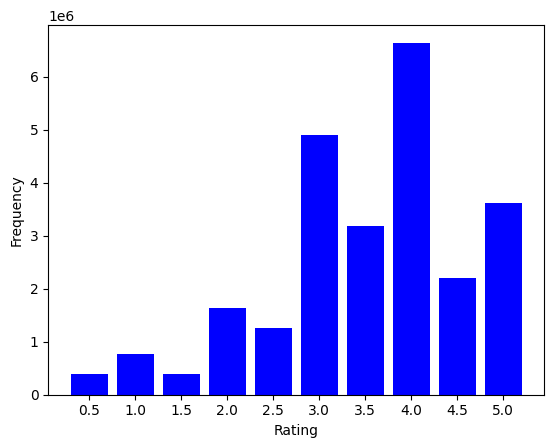

In [ ]:
#@title Distribtuion of rating data

rates, effectifs = np.unique(ratings[:,2], return_counts=True)
# print(rates)

plt.bar(x=np.arange(10),height=effectifs, color="blue", tick_label=rates)
plt.xlabel("Rating")
plt.ylabel("Frequency")
# plt.title("Rating distribution")
plt.savefig("rating_distributions.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
files.download("rating_distributions.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#@title Distribtuion of rating data

rates, effectifs = np.unique(ratings[:,2], return_counts=True)
# print(rates)

plt.bar(x=np.arange(10),height=effectifs, color="blue", tick_label=rates)
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Rating distribution")
plt.savefig("rating_distributions.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
mv, effectifs = np.unique(ratings[:,1], return_counts=True)

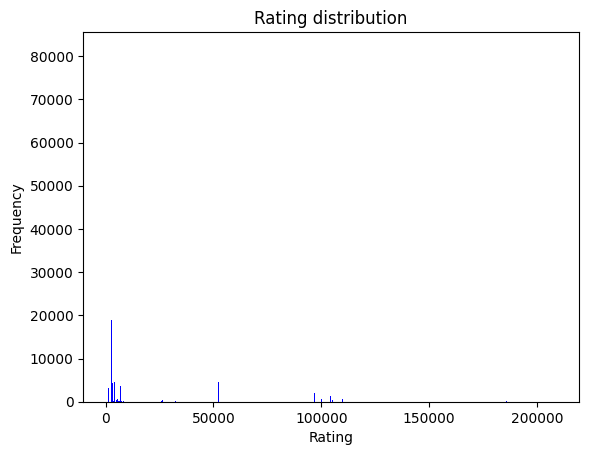

In [ ]:
plt.bar(mv, effectifs, color="blue")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Rating distribution")
plt.savefig("rating_distributions.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
# list_of_ratings, counts = np.unique(ratings[:,2], return_counts=True)

In [ ]:
# print(list_of_ratings)
# print(counts)

[0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
[ 393068  776815  399490 1640868 1262797 4896928 3177318 6639798 2200539
 3612474]


In [ ]:
#@title Function to plot power law
def plot_pl(item_data, color = "black", label="log scale", title = "Power law", code="ro", axis=None):
  #Get number of ratings per user
  _, counts = np.unique(item_data, return_counts=True)
  #set of the number of ratings
  number_of_ratings_per_user = np.unique(counts)
  #Popularity of each number of ratings
  popularity = [len(np.where(counts == n)[0]) for n in number_of_ratings_per_user]

  # plt.plot(np.log(number_of_ratings_per_user), np.log(popularity), 'g')
  if axis:
    axis.plot(np.log(number_of_ratings_per_user), np.log(popularity), code, label=label)
    axis.set_xlabel("Number of ratings")
    axis.set_ylabel("Popularity")
    # axis.set_title(f"{title}")
    # axis.legend()
  else:
    plt.plot(np.log(number_of_ratings_per_user), np.log(popularity), code, label=label)
    plt.xlabel("Number of ratings")
    plt.ylabel("Popularity")
    # plt.title(f"{title}")
    # plt.legend()

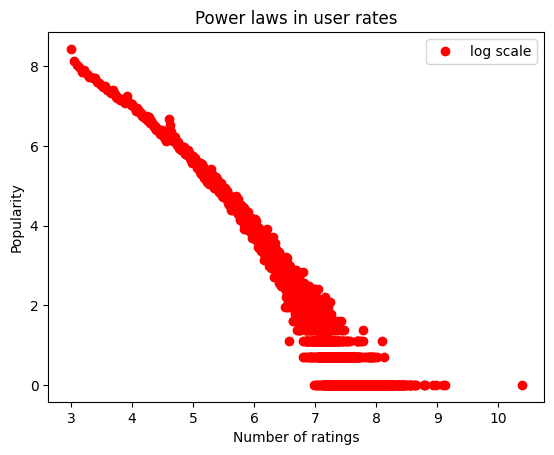

In [ ]:
# fig, ax = plt.subplots(1,2, figsize=(10,5))
plot_pl(ratings[:,0], color = "blue", title = "Power laws in user rates", code="ro")
# plot_pl(ratings[:,1], color = "green", title = "Power law in Movie rated")
# plot_pl(ratings.rating.values, color = "red", title = "Power law in Rating", axis = ax[2])
# plt.tight_layout()
plt.savefig("power_law_user_rates.pdf", format="pdf", bbox_inches="tight")
# plt.show()

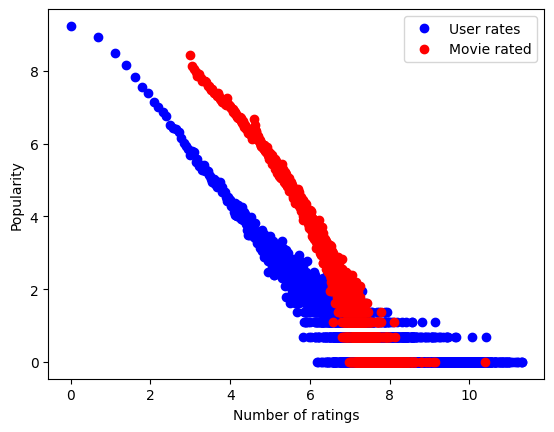

In [ ]:
plot_pl(ratings[:,1], color = "green", label="User rates", code="bo")
plot_pl(ratings[:,0], color = "blue", label="Movie rated", code="ro")
# plot_pl(ratings.rating.values, color = "red", title = "Power law in Rating", axis = ax[2])
# plt.tight_layout()
# plt.title("Power laws")
plt.legend()
plt.savefig("power_law_movie_rated.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
from google.colab import files
files.download("power_law_movie_rated.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# fig, ax = plt.subplots(1,2, figsize=(8,4))
# plot_pl(tags.userId.values, color = "blue", title = "Power law in users who have tagged", axis = ax[0])
# plot_pl(tags.movieId.values, color = "green", title = "Power law in Movie tagged", axis = ax[1])
# plt.tight_layout()
# plt.show()

In [ ]:
# plot_pl(ratings.userId.values, title = "Power law in Ratings")

In [ ]:
# from google.colab import files

# # Télécharger le fichier
# files.download('/content/covariance.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>